In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\saiakash.lakkakula\Desktop\data.csv")

In [4]:
df.head(3)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
df.loc[:1983]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,Chevrolet,Blazer,2005,regular unleaded,190.0,6.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,17,13,1385,24305
1980,Chevrolet,Blazer,2005,regular unleaded,190.0,6.0,MANUAL,rear wheel drive,2.0,NaN,Compact,2dr SUV,20,14,1385,21305
1981,Chevrolet,Blazer,2005,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Midsize,4dr SUV,20,15,1385,25480
1982,Chevrolet,Blazer,2005,regular unleaded,190.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Midsize,4dr SUV,18,14,1385,27480


In [6]:
df.tail(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
# converting column names to  upper case and replace spaces with underscores
df.columns = df.columns.str.upper().str.replace(" ", "_")

In [10]:
df['ENGINE_FUEL_TYPE'] = df.groupby(['MAKE', 'MODEL', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS','VEHICLE_SIZE','VEHICLE_STYLE'])['ENGINE_FUEL_TYPE'].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
df.isna().sum()

MAKE                    0
MODEL                   0
YEAR                    0
ENGINE_FUEL_TYPE        0
ENGINE_HP              69
ENGINE_CYLINDERS       30
TRANSMISSION_TYPE       0
DRIVEN_WHEELS           0
NUMBER_OF_DOORS         6
MARKET_CATEGORY      3742
VEHICLE_SIZE            0
VEHICLE_STYLE           0
HIGHWAY_MPG             0
CITY_MPG                0
POPULARITY              0
MSRP                    0
dtype: int64

In [12]:

'''So pd.notna() is to check if a value is a NAN or not'''
df['ENGINE_CYLINDERS'] = df.groupby(['MAKE', 'MODEL', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS'])['ENGINE_CYLINDERS'].transform(
    lambda x: x )

df

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [13]:
# import numpy as np

'''So pd.notna() is to check if a value is a NAN or not'''
df['ENGINE_CYLINDERS'] = df.groupby(['MAKE', 'MODEL', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS'])['ENGINE_CYLINDERS'].transform(
    lambda x: x.fillna(x.median() if pd.notna(x.median()) else -1))


C:\Users\saiakash.lakkakula\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\saiakash.lakkakula\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\saiakash.lakkakula\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\saiakash.lakkakula\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\saiakash.lakkakula\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis

In [14]:
df.isna().sum()

MAKE                    0
MODEL                   0
YEAR                    0
ENGINE_FUEL_TYPE        0
ENGINE_HP              69
ENGINE_CYLINDERS        0
TRANSMISSION_TYPE       0
DRIVEN_WHEELS           0
NUMBER_OF_DOORS         6
MARKET_CATEGORY      3742
VEHICLE_SIZE            0
VEHICLE_STYLE           0
HIGHWAY_MPG             0
CITY_MPG                0
POPULARITY              0
MSRP                    0
dtype: int64

In [15]:
df.query("MAKE == 'Mazda' and MODEL=='RX-8'")

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY,MSRP
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,-1.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,-1.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,-1.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,-1.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,-1.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,-1.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,-1.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560
8705,Mazda,RX-8,2010,premium unleaded (required),232.0,-1.0,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,32140
8706,Mazda,RX-8,2010,premium unleaded (required),212.0,-1.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26645
8707,Mazda,RX-8,2010,premium unleaded (required),212.0,-1.0,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,32810


In [16]:
df.query("MAKE=='Chevrolet' and MODEL=='Bolt EV'")

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,-1.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,-1.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620


In [17]:
df['ENGINE_HP'] = df.groupby(['MAKE', 'MODEL', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS'])['ENGINE_HP'].transform(
    lambda x: x.fillna(x.median() if not x.dropna().empty else -1)
)

In [18]:
df.isna().sum()

MAKE                    0
MODEL                   0
YEAR                    0
ENGINE_FUEL_TYPE        0
ENGINE_HP               0
ENGINE_CYLINDERS        0
TRANSMISSION_TYPE       0
DRIVEN_WHEELS           0
NUMBER_OF_DOORS         6
MARKET_CATEGORY      3742
VEHICLE_SIZE            0
VEHICLE_STYLE           0
HIGHWAY_MPG             0
CITY_MPG                0
POPULARITY              0
MSRP                    0
dtype: int64

In [19]:
df.isna().sum()

MAKE                    0
MODEL                   0
YEAR                    0
ENGINE_FUEL_TYPE        0
ENGINE_HP               0
ENGINE_CYLINDERS        0
TRANSMISSION_TYPE       0
DRIVEN_WHEELS           0
NUMBER_OF_DOORS         6
MARKET_CATEGORY      3742
VEHICLE_SIZE            0
VEHICLE_STYLE           0
HIGHWAY_MPG             0
CITY_MPG                0
POPULARITY              0
MSRP                    0
dtype: int64

In [20]:
df['NUMBER_OF_DOORS'] = df.groupby(['MAKE', 'MODEL', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS'])['NUMBER_OF_DOORS'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -1)
)


In [21]:
df.query("MAKE=='Ferrari' and MODEL=='FF'")

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,VEHICLE_SIZE,VEHICLE_STYLE,HIGHWAY_MPG,CITY_MPG,POPULARITY,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4667,Ferrari,FF,2014,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4668,Ferrari,FF,2015,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


In [22]:
# now i am converting the values in to a list because from those list i'll retrieve all the unique values

df['new_category_list'] = df['MARKET_CATEGORY'].fillna("unknown").apply(lambda x: x.split(','))


In [23]:
# Get a list of all unique categories
unique_categories = sorted(set(category for sublist in df['new_category_list'] for category in sublist))


In [24]:
unique_categories

['Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'Performance',
 'unknown']

In [25]:
# performing binary encoding 

''' If the values in unique_categories are present in the new_category_list then it will be given 1 or 0 '''

for category in unique_categories:
    df[f'MARKET_{category.upper().replace(" ", "_")}'] = df['new_category_list'].apply(lambda x: 1 if category in x else 0)


In [26]:
df

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,...,MARKET_DIESEL,MARKET_EXOTIC,MARKET_FACTORY_TUNER,MARKET_FLEX_FUEL,MARKET_HATCHBACK,MARKET_HIGH-PERFORMANCE,MARKET_HYBRID,MARKET_LUXURY,MARKET_PERFORMANCE,MARKET_UNKNOWN
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,0,0,1,0,0,1,0,1,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,1,1,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,0,0,0,0,0,1,0,1,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,1,1,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,0,0,0,0,1,0,0,1,0,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,0,0,0,0,1,0,0,1,0,0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,0,0,0,0,1,0,0,1,0,0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,0,0,0,0,1,0,0,1,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MAKE                     11914 non-null  object 
 1   MODEL                    11914 non-null  object 
 2   YEAR                     11914 non-null  int64  
 3   ENGINE_FUEL_TYPE         11914 non-null  object 
 4   ENGINE_HP                11914 non-null  float64
 5   ENGINE_CYLINDERS         11914 non-null  float64
 6   TRANSMISSION_TYPE        11914 non-null  object 
 7   DRIVEN_WHEELS            11914 non-null  object 
 8   NUMBER_OF_DOORS          11914 non-null  float64
 9   MARKET_CATEGORY          8172 non-null   object 
 10  VEHICLE_SIZE             11914 non-null  object 
 11  VEHICLE_STYLE            11914 non-null  object 
 12  HIGHWAY_MPG              11914 non-null  int64  
 13  CITY_MPG                 11914 non-null  int64  
 14  POPULARITY            

In [28]:
print(df['MARKET_CATEGORY'].head(10))  # Show first 10 values


0    Factory Tuner,Luxury,High-Performance
1                       Luxury,Performance
2                  Luxury,High-Performance
3                       Luxury,Performance
4                                   Luxury
5                       Luxury,Performance
6                       Luxury,Performance
7                  Luxury,High-Performance
8                                   Luxury
9                                   Luxury
Name: MARKET_CATEGORY, dtype: object


In [29]:
df.head()

,MAKE,MODEL,YEAR,ENGINE_FUEL_TYPE,ENGINE_HP,ENGINE_CYLINDERS,TRANSMISSION_TYPE,DRIVEN_WHEELS,NUMBER_OF_DOORS,MARKET_CATEGORY,...,MARKET_DIESEL,MARKET_EXOTIC,MARKET_FACTORY_TUNER,MARKET_FLEX_FUEL,MARKET_HATCHBACK,MARKET_HIGH-PERFORMANCE,MARKET_HYBRID,MARKET_LUXURY,MARKET_PERFORMANCE,MARKET_UNKNOWN
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,0,0,1,0,0,1,0,1,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,1,1,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,0,0,0,0,0,1,0,1,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,1,1,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,0,0,0,0,0,0,0,1,0,0


In [30]:
df['new_category_list'].head(10)

0    [Factory Tuner, Luxury, High-Performance]
1                        [Luxury, Performance]
2                   [Luxury, High-Performance]
3                        [Luxury, Performance]
4                                     [Luxury]
5                        [Luxury, Performance]
6                        [Luxury, Performance]
7                   [Luxury, High-Performance]
8                                     [Luxury]
9                                     [Luxury]
Name: new_category_list, dtype: object

In [31]:
print([col for col in df.columns if col.startswith('MARKET_')])


['MARKET_CATEGORY', 'MARKET_CROSSOVER', 'MARKET_DIESEL', 'MARKET_EXOTIC', 'MARKET_FACTORY_TUNER', 'MARKET_FLEX_FUEL', 'MARKET_HATCHBACK', 'MARKET_HIGH-PERFORMANCE', 'MARKET_HYBRID', 'MARKET_LUXURY', 'MARKET_PERFORMANCE', 'MARKET_UNKNOWN']


ANALYSIS PART 

1. How many cars belong to each market category


In [47]:
market_cols = [col for col in df.columns if col.startswith('MARKET_')]
market_cols.remove('MARKET_CATEGORY')

In [48]:
market_cols

['MARKET_CROSSOVER',
 'MARKET_DIESEL',
 'MARKET_EXOTIC',
 'MARKET_FACTORY_TUNER',
 'MARKET_FLEX_FUEL',
 'MARKET_HATCHBACK',
 'MARKET_HIGH-PERFORMANCE',
 'MARKET_HYBRID',
 'MARKET_LUXURY',
 'MARKET_PERFORMANCE',
 'MARKET_UNKNOWN']

In [33]:
# as the values in these columns may contain NULL as a string so we need to convert them to 0 
df.replace('Nan',0 ,inplace=True)

In [34]:
category_counts = df[market_cols].sum().sort_values(ascending=False)

In [35]:
category_counts

MARKET_UNKNOWN             3742
MARKET_LUXURY              3288
MARKET_PERFORMANCE         2114
MARKET_CROSSOVER           2034
MARKET_HIGH-PERFORMANCE    1387
MARKET_HATCHBACK           1208
MARKET_FLEX_FUEL           1197
MARKET_FACTORY_TUNER        621
MARKET_EXOTIC               501
MARKET_HYBRID               347
MARKET_DIESEL               206
dtype: int64

C:\Users\saiakash.lakkakula\AppData\Local\Temp\ipykernel_10292\2136084891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


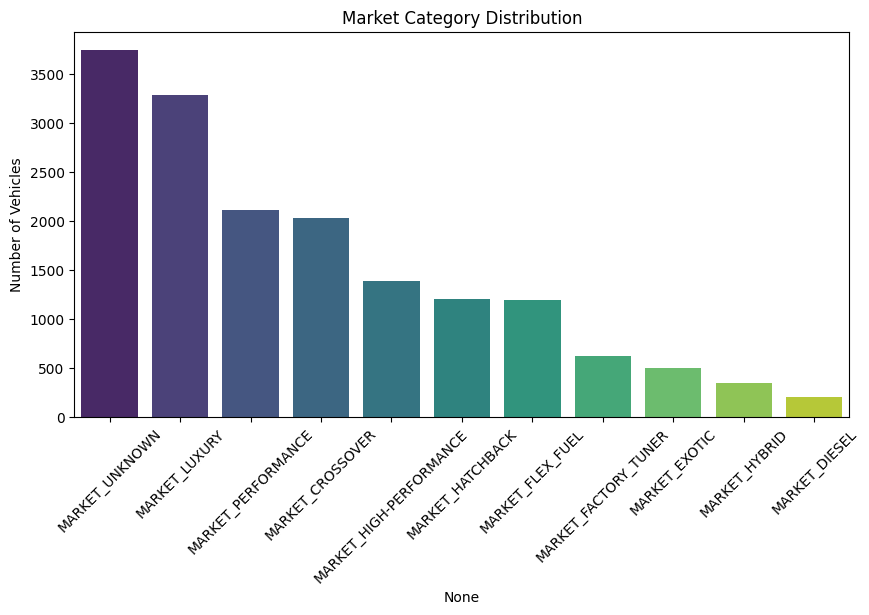

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get category counts


# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Number of Vehicles")
plt.title("Market Category Distribution")
plt.show()


In [72]:
df.groupby(market_cols)['ENGINE_HP'].mean()

MARKET_CROSSOVER  MARKET_DIESEL  MARKET_EXOTIC  MARKET_FACTORY_TUNER  MARKET_FLEX_FUEL  MARKET_HATCHBACK  MARKET_HIGH-PERFORMANCE  MARKET_HYBRID  MARKET_LUXURY  MARKET_PERFORMANCE  MARKET_UNKNOWN
0                 0              0              0                     0                 0                 0                        0              0              0                   1                 194.708979
                                                                                                                                                                 1                   0                 234.901830
                                                                                                                                                  1              0                   0                 234.382456
                                                                                                                                                                 1            

2. Average HorsePower category wise

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11906    300.0
11907    300.0
11908    300.0
11909    300.0
11910    300.0
Name: ENGINE_HP, Length: 323, dtype: float64


In [67]:
market_dict = {}

for col in market_cols:
    market_dict[col] = df.loc[df[col] == 1, 'ENGINE_HP'].mean()

In [82]:
for key,item in market_dict.items():
    print(f'{key}:\t{item}')


MARKET_CROSSOVER:	243.01524090462144
MARKET_DIESEL:	208.7864077669903
MARKET_EXOTIC:	486.76646706586826
MARKET_FACTORY_TUNER:	414.8389694041868
MARKET_FLEX_FUEL:	292.35505430242273
MARKET_HATCHBACK:	159.41970198675497
MARKET_HIGH-PERFORMANCE:	444.041095890411
MARKET_HYBRID:	217.15273775216139
MARKET_LUXURY:	311.70620437956205
MARKET_PERFORMANCE:	271.15137180700094
MARKET_UNKNOWN:	194.7089791555318


In [77]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.

    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::

        import numpy as np
        import matplotlib.pyplot as plt

        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
        plt.show()

    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the Axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::

        import numpy as np
        import matplotlib.pyplot as plt

        x = np.arang

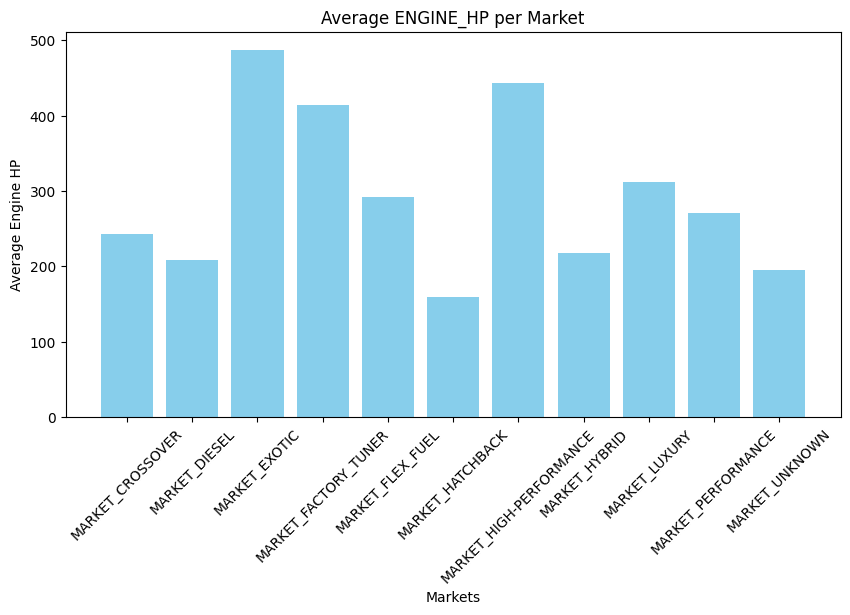

In [80]:
import matplotlib.pyplot as plt
markets = list(market_dict.keys())
avg_hp = list(market_dict.values())


plt.figure(figsize=(10, 5))
plt.bar(markets, avg_hp, color='skyblue')

plt.xlabel("Markets")
plt.ylabel("Average Engine HP")
plt.title("Average ENGINE_HP per Market")
plt.xticks(rotation=45)  


plt.show()


In [ ]:
# mcl_engine_hp = pd.DataFrame(columns=['MCL','Mean'])# dict()
# for i, mcl in enumerate(market_cols):
#     mcl_engine_hp.loc[i,'MCL'] = mcl
#     mcl_engine_hp.loc[i,'Mean'] = df(df[mcl]==1)['ENGINE_HP'].mean()
    


TypeError: 'DataFrame' object is not callable

In [50]:
# car_hp = df.groupby(market_cols)['ENGINE_HP'].mean()

# car_hp

MARKET_CROSSOVER  MARKET_DIESEL  MARKET_EXOTIC  MARKET_FACTORY_TUNER  MARKET_FLEX_FUEL  MARKET_HATCHBACK  MARKET_HIGH-PERFORMANCE  MARKET_HYBRID  MARKET_LUXURY  MARKET_PERFORMANCE  MARKET_UNKNOWN
0                 0              0              0                     0                 0                 0                        0              0              0                   1                 194.708979
                                                                                                                                                                 1                   0                 234.901830
                                                                                                                                                  1              0                   0                 234.382456
                                                                                                                                                                 1            

In [37]:
# df.query("AVG('ENGINE_HP') groupby 'market_cols'")

In [38]:
# car_hp

MARKET_CROSSOVER  MARKET_DIESEL  MARKET_EXOTIC  MARKET_FACTORY_TUNER  MARKET_FLEX_FUEL  MARKET_HATCHBACK  MARKET_HIGH-PERFORMANCE  MARKET_HYBRID  MARKET_LUXURY  MARKET_PERFORMANCE  MARKET_UNKNOWN
0                 0              0              0                     0                 0                 0                        0              0              0                   1                 194.708979
                                                                                                                                                                 1                   0                 234.901830
                                                                                                                                                  1              0                   0                 234.382456
                                                                                                                                                                 1            

In [ ]:
# car_hp = df.groupby(market_cols, as_index=False)['ENGINE_HP'].mean()

# car_hp


,MARKET_CROSSOVER,MARKET_DIESEL,MARKET_EXOTIC,MARKET_FACTORY_TUNER,MARKET_FLEX_FUEL,MARKET_HATCHBACK,MARKET_HIGH-PERFORMANCE,MARKET_HYBRID,MARKET_LUXURY,MARKET_PERFORMANCE,MARKET_UNKNOWN,ENGINE_HP
0,0,0,0,0,0,0,0,0,0,0,1,194.708979
1,0,0,0,0,0,0,0,0,0,1,0,234.901830
2,0,0,0,0,0,0,0,0,1,0,0,234.382456
3,0,0,0,0,0,0,0,0,1,1,0,298.512630
4,0,0,0,0,0,0,0,1,0,0,0,216.146341
...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,0,0,1,0,1,0,0,0,1,0,213.000000
68,1,0,1,0,0,0,0,0,1,1,0,345.000000
69,1,0,1,0,0,0,1,0,1,0,0,424.000000
70,1,1,0,0,0,0,0,0,0,0,0,237.285714


FUTURE SCOPE : 



1. If it is a dimension table with the given customer table then we can try to find the some more insights


2. Insights such as customer_per_car_category, customer_per_car_model , customer_per_year etc 


3. With these customer related data , the company can create a customer profile, which is a detailed description of the customer's behavior, and the amount of money they spend on the company's products or services. This profile can be used to tailor the marketing efforts to the specific needs of the customer, and to increase the chances of making a sale.